## Exploratory Data Analysis & Intro

### Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

### Final Deliverables:

*  Create Jupyter Notebooks (showcasing core skills in Python).
*  Create a summary page (via README.md) capturing your findings.
*  Share this project via GitHub & LinkedIn.

### Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-deman skills trending for Data Analysis?
3. How well do jobs and skills pay for Data Analysis?
4. What is the most optimal skill to lear for Data Analysts? (High Demand AND High Paying)

### Exploratory Data Analysis for all Data Roles

#### Roles to Explore

In [2]:
# Importing Libraries:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter for Mexico Data Analyst roles

In [3]:
df_DA_MX = df[(df['job_country'] == 'Mexico') & (df['job_title_short'] == 'Data Analyst')]

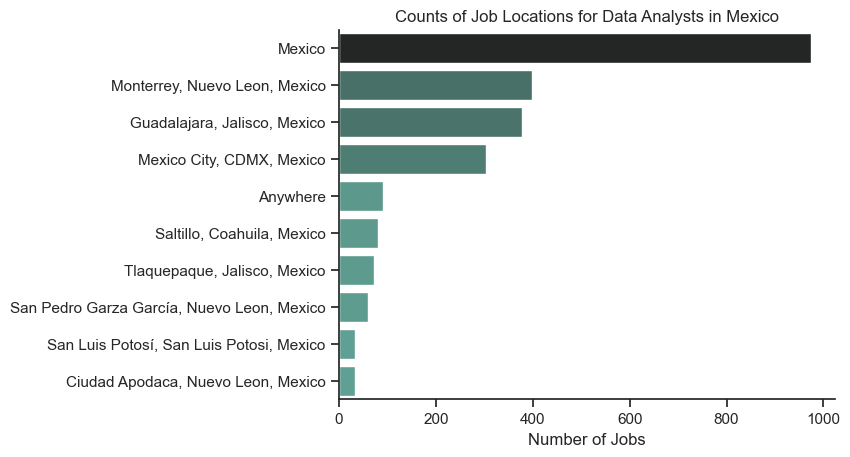

In [18]:
df_plot = df_DA_MX['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:#5A9_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in Mexico')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

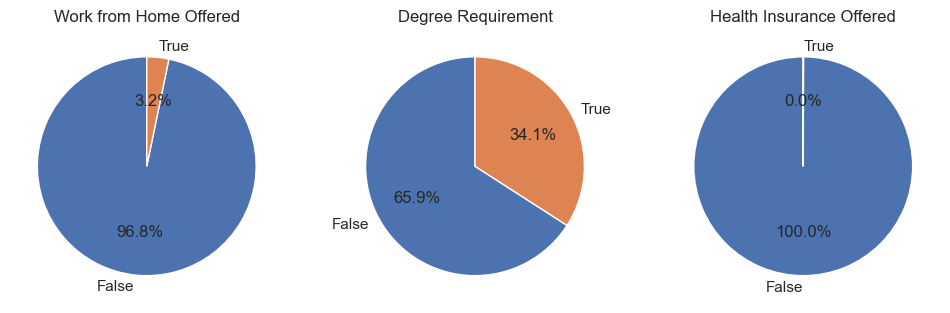

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_MX[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

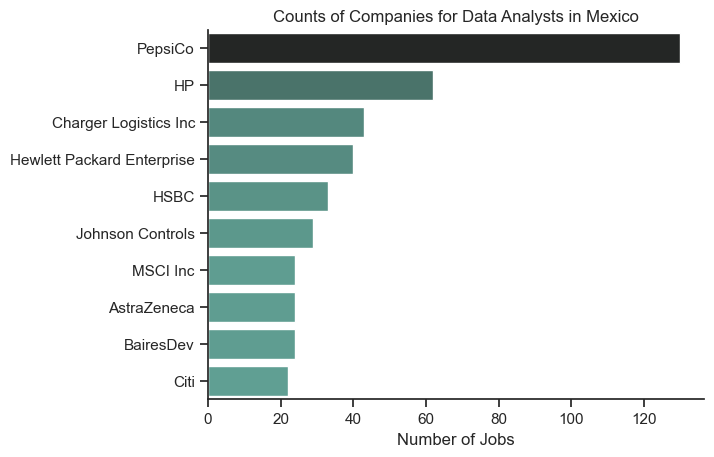

In [19]:
df_plot = df_DA_MX['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:#5A9_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analysts in Mexico')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()